## Tracer Mass and HCW calculations using xarray

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import xarray as xr


In [2]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file_NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'

grid = xr.open_dataset(grid_file)
grid_NoC = xr.open_dataset(grid_file_NoC)

## Missing run45 and 48
ptracer38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
ptracer42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

ptracer37 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/ptracersGlob.nc'
ptracer36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/ptracersGlob.nc'
ptracer44 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run44/ptracersGlob.nc'
ptracer46 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run46/ptracersGlob.nc'
ptracer43 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run43/ptracersGlob.nc'
ptracer51 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run51/ptracersGlob.nc'
ptracer52 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run52/ptracersGlob.nc'

ptracer53 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run53/ptracersGlob.nc'
ptracer41 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run41/ptracersGlob.nc'
ptracer40 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run40/ptracersGlob.nc'
ptracer47 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run47/ptracersGlob.nc'
ptracer49 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run49/ptracersGlob.nc'
ptracer50 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run50/ptracersGlob.nc'
ptracer54 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run54/ptracersGlob.nc'

ptracer55 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run55/ptracersGlob.nc'
ptracer56 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run56/ptracersGlob.nc'
ptracer57 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run57/ptracersGlob.nc'
ptracer58 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run58/ptracersGlob.nc'
ptracer59 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run59/ptracersGlob.nc'
ptracer60 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run60/ptracersGlob.nc'

ptracer043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
ptracer053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
ptracer063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
ptracer073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'

In [3]:
run38 = xr.open_dataset(ptracer38) 
run37 = xr.open_dataset(ptracer37)  
run36 = xr.open_dataset(ptracer36)  
run44 = xr.open_dataset(ptracer44)  
run46 = xr.open_dataset(ptracer46)  
run43 = xr.open_dataset(ptracer43)  
run51 = xr.open_dataset(ptracer51)  
run52 = xr.open_dataset(ptracer52)  

run41 = xr.open_dataset(ptracer41)  
run42 = xr.open_dataset(ptracer42)
run40 = xr.open_dataset(ptracer40)  
run47 = xr.open_dataset(ptracer47)  
run49 = xr.open_dataset(ptracer49)  
run50 = xr.open_dataset(ptracer50)  
run53 = xr.open_dataset(ptracer53)  
run54 = xr.open_dataset(ptracer54)  

run55 = xr.open_dataset(ptracer55)  
run56 = xr.open_dataset(ptracer56)  
run57 = xr.open_dataset(ptracer57)  
run58 = xr.open_dataset(ptracer58)  
run59 = xr.open_dataset(ptracer59)  
run60 = xr.open_dataset(ptracer60)  

run043D = xr.open_dataset(ptracer043D) 
run053D = xr.open_dataset(ptracer053D) 
run063D = xr.open_dataset(ptracer063D) 
run073D = xr.open_dataset(ptracer073D)

In [4]:
def TrOnShelf(Tr,hfacNoC,rA,drF):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general
    hfacNoC : fraction of open cell for NoC case
    rA    : Area of cell faces at C points (HAS TO BE THE SIZE OF XY DOMAIN)
    drF   : Distance between cell faces (90)
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    Total_Tracer on given domain
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''

  TrMass  = (hfacNoC*Tr*rA*drF).sum(dim=['Z','Y','X'])
  
  return(TrMass*1000.0)
     
  

In [5]:
trac38 = TrOnShelf(run38.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac37 = TrOnShelf(run37.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac36 = TrOnShelf(run36.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac44 = TrOnShelf(run44.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac46 = TrOnShelf(run46.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac43 = TrOnShelf(run43.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac51 = TrOnShelf(run51.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac52 = TrOnShelf(run52.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac043D = TrOnShelf(run043D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac053D = TrOnShelf(run053D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac063D = TrOnShelf(run063D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac073D = TrOnShelf(run073D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac42 = TrOnShelf(run42.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac53 = TrOnShelf(run53.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac41 = TrOnShelf(run41.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac40 = TrOnShelf(run40.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac47 = TrOnShelf(run47.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac49 = TrOnShelf(run49.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac50 = TrOnShelf(run50.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac54 = TrOnShelf(run54.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac55 = TrOnShelf(run55.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac56 = TrOnShelf(run56.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac57 = TrOnShelf(run57.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac58 = TrOnShelf(run58.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac59 = TrOnShelf(run59.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac60 = TrOnShelf(run60.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])


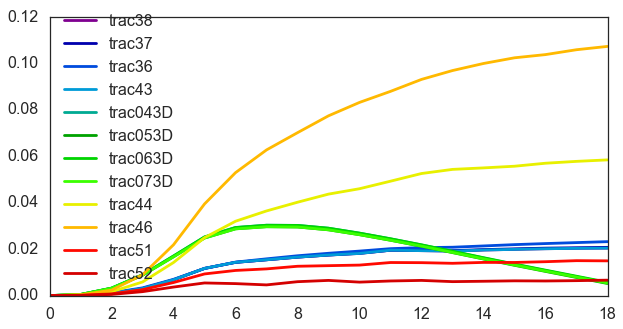

In [6]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('spectral',12)

labels = ['trac38','trac37','trac36','trac43','trac043D','trac053D','trac063D','trac073D','trac44','trac46',
          'trac51','trac52']

mass_list = [trac38-trac42,trac37-trac41,trac36-trac40,trac43-trac50,trac043D-trac50,trac053D-trac50,trac063D-trac42,
             trac073D-trac42,trac44-trac47,trac46-trac49,trac51-trac53,trac52-trac54]

mass_list_NoC = [trac42,trac41,trac40,trac50,trac50,trac50,trac42,trac42,trac47,trac49,trac53,trac54]

fig,ax = plt.subplots(1,1,figsize=(10,5))
for mass,mass_NoC,lab in zip(mass_list,mass_list_NoC,labels):
    ax.plot(mass/mass_NoC, label=lab)

ax.legend(loc=0)


In [7]:
trac38small = TrOnShelf(run38.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac37small = TrOnShelf(run37.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac36small = TrOnShelf(run36.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac44small = TrOnShelf(run44.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac46small = TrOnShelf(run46.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac43small = TrOnShelf(run43.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac51small = TrOnShelf(run51.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac52small = TrOnShelf(run52.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac043Dsmall = TrOnShelf(run043D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac053Dsmall = TrOnShelf(run053D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac063Dsmall = TrOnShelf(run063D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac073Dsmall = TrOnShelf(run073D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])



trac42small = TrOnShelf(run42.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac53small = TrOnShelf(run53.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac41small = TrOnShelf(run41.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac40small = TrOnShelf(run40.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac47small = TrOnShelf(run47.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac49small = TrOnShelf(run49.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac50small = TrOnShelf(run50.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac54small = TrOnShelf(run54.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac55small = TrOnShelf(run55.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac56small = TrOnShelf(run56.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac57small = TrOnShelf(run57.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac58small = TrOnShelf(run58.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac59small = TrOnShelf(run59.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac60small = TrOnShelf(run60.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])


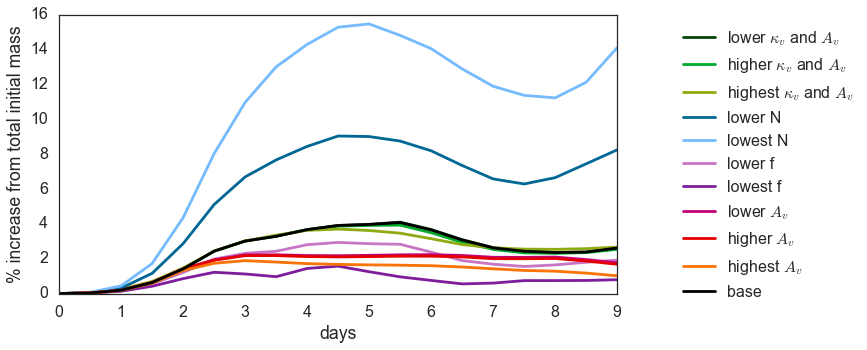

In [8]:
sns.set_context('poster')
sns.set_style('white')

colors = ['forest green',
          'kelly green',
          'pea green',
          'peacock blue',
          'sky blue',
          'orchid',
          'purple'
          ,'magenta',
          'red',
          'orange',
          'black']


labels = ['lower $\kappa_v$ and $A_v$',
          'higher $\kappa_v$ and $A_v$',
          'highest $\kappa_v$ and $A_v$',
          'lower N',
          'lowest N',
          'lower f',
          'lowest f',
          'lower $A_v$',
          'higher $A_v$',
          'highest $A_v$',
          'base']

mass_list = [trac43small-trac50small,
             trac37small-trac41small,
             trac36small-trac40small,
             trac44small-trac47small,
             trac46small-trac49small,
             trac51small-trac53small,
             trac52small-trac54small,
             trac55small-trac58small,
             trac56small-trac59small,
             trac57small-trac60small,
             trac38small-trac42small]

mass_list_NoC = [trac50small,
                 trac41small,
                 trac40small,
                 trac47small,
                 trac49small,
                 trac54small,
                 trac53small,
                 trac58small,
                 trac59small,
                 trac60small,
                 trac42small]

fig,ax = plt.subplots(1,1,figsize=(10,5))
for mass,mass_NoC,lab,color in zip(mass_list,mass_list_NoC,labels,colors):
    ax.plot(np.arange(19)/2.0,100*mass/mass_NoC,color=sns.xkcd_rgb[color],label=lab)
    
ax.set_xlabel('days')
ax.set_ylabel('% increase from total initial mass')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

fig.savefig('Mass_small_domain_canyon_effect.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


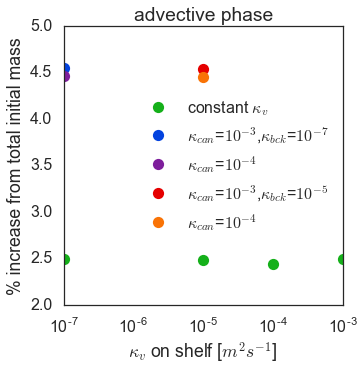

In [9]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$=$10^{-3}$,$\kappa_{bck}$=$10^{-7}$',
          '$\kappa_{can}$=$10^{-4}$',
          '$\kappa_{can}$=$10^{-3}$,$\kappa_{bck}$=$10^{-5}$',
          '$\kappa_{can}$=$10^{-4}$']

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

mass_list = [trac43small-trac50small,trac38small-trac42small,trac37small-trac41small,trac36small-trac40small,
             trac043Dsmall-trac50small,trac053Dsmall-trac50small,trac063Dsmall-trac42small,trac073Dsmall-trac42small,
             ]

mass_list_NoC = [trac50small,trac42small,trac41small,trac40small,trac50small,trac50small,trac42small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,kv_num in zip(mass_list,mass_list_NoC,labels,colors,kv):
    ax.plot(kv_num,100*(mass/mass_NoC[0]).mean(),'o',color=sns.xkcd_rgb[color],label=lab)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf [$m^2s^{-1}$]')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=0)

fig.savefig('Mass_small_domain_canyon_effect_diffusivity_new_visc.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


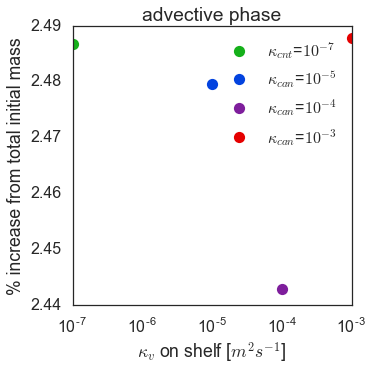

In [10]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['$\kappa_{cnt}$=$10^{-7}$',
          '$\kappa_{can}$=$10^{-5}$',
          '$\kappa_{can}$=$10^{-4}$',
          '$\kappa_{can}$=$10^{-3}$']

colors = ['green','blue','purple','red']

kv = [1E-7,1E-5,1E-4,1E-3]

mass_list = [trac43small-trac50small,trac38small-trac42small,trac37small-trac41small,trac36small-trac40small]

mass_list_NoC = [trac50small,trac42small,trac41small,trac40small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,kv_num in zip(mass_list,mass_list_NoC,labels,colors,kv):
    ax.plot(kv_num,100*(mass/mass_NoC[0]).mean(),'o',color=sns.xkcd_rgb[color],label=lab)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf [$m^2s^{-1}$]')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=0)

fig.savefig('Mass_small_domain_canyon_effect_diffusivity_cnt_new_visc.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


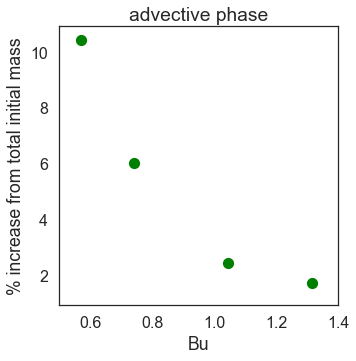

In [11]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)


Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

mass_list = [trac38small-trac42small,
             trac44small-trac47small,
             trac46small-trac49small,
             trac51small-trac53small,
             trac52small-trac54small]

mass_list_NoC = [trac42small,
                 trac47small,
                 trac49small,
                 trac53small,
                 trac54small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,bu in zip(mass_list,mass_list_NoC,labels,colors,Bu):
    ax.plot(bu,100*(mass/mass_NoC[0]).mean(),'go')

ax.set_xlabel('Bu')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')


fig.savefig('Mass_small_domain_canyon_effect_Nf_new_visc.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


In [12]:
ptracer03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
ptracer07 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'

run03 = xr.open_dataset(ptracer03) 
run07 = xr.open_dataset(ptracer07) 

trac03 = TrOnShelf(run03.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac07 = TrOnShelf(run07.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac03small = TrOnShelf(run03.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac07small = TrOnShelf(run07.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


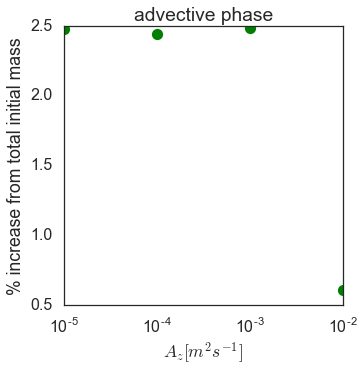

In [13]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-2,1E-3,1E-4,1E-5])

mass_list = [trac03small-trac07small,trac36small-trac40small,trac37small-trac41small,trac38small-trac42small]

mass_list_NoC = [trac07small,trac40small,trac41small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,visc in zip(mass_list,mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*(mass/mass_NoC[0]).mean(),'go')

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z [m^2s^{-1}]$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_Av_and_Kv.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda/envs/mypython3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


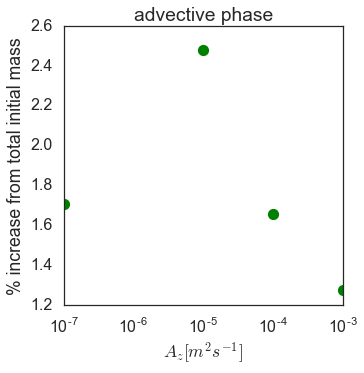

In [14]:
sns.set_context('poster')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-7,1E-5,1E-4,1E-3])

mass_list = [trac55small-trac58small,trac38small-trac42small,trac56small-trac59small,trac57small-trac60small]

mass_list_NoC = [trac58small,trac42small,trac59small,trac60small]

fig,ax = plt.subplots(1,1,figsize=(5,5))
for mass,mass_NoC,lab,color,visc in zip(mass_list,mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*(mass/mass_NoC[0]).mean(),'go')

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z [m^2s^{-1}]$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
